# MIS780 Advanced AI For Business - Assessment 2 - T2 2025

## Task Number: Image-Based Recyclable Material Classification

**Student Name:** _Huy Hung Pham_

**Student ID:** _s224212292_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)

5. [Role of GenAI](#cell_GenAI)



<a id = "cell_Summary"></a>
## 1.Executive Summary

Efficient waste management and recycling are crucial for achieving a sustainable future. A key challenge in this field is the accurate classification of recyclable materials, as misclassification can diminish recycling efficiency and worsen environmental impacts. This study addresses the automation of recyclable material classification through machine learning models, aiming to enhance sorting accuracy and recycling outcomes.

The dataset used consisted of 2,691 images across six categories of recyclable materials: cardboard, clothing, paper, metal, green glass, and white glass. It was divided into 70% for training and 30% for testing, allowing for a balanced evaluation of model performance.

Various models were developed, including artificial neural networks (ANNs) and convolutional neural networks (CNNs), featuring different architectures. ANN models utilized one or two dense layers with dropout regularization, while CNNs included multiple convolutional, pooling, and dense layers to capture spatial hierarchies. Models were evaluated based on accuracy, Cohen’s kappa, test loss, classification reports, and confusion matrices.

Results indicated that ANN models achieved accuracy levels between 65% and 82%, with the best performance from Model 3 (82.1% accuracy). CNN models ranged from 77% to 81%, with Model 6 achieving 80.9% accuracy. While Model 3 slightly outperformed Model 6, CNNs are considered more scalable and robust for real-world applications due to their ability to extract spatial features. Both models faced difficulties in distinguishing clothing from cardboard and green from white glass due to high variability and visual similarity.

In conclusion, this study demonstrates the effectiveness of deep learning models for recyclable material classification, achieving accuracies above 80%. For long-term sustainability, CNN-based approaches, potentially enhanced with transfer learning and larger datasets, are recommended to improve recycling efficiency and support environmental sustainability goals.

<a id = "cell_Preprocessing"></a>
## 2.Data Preprocessing

#### 2.1 Data Loading and Exploration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import os
import tensorflow as tf

# Set the paths to the folders containing the image files
cardboard_path = '/content/Task 2 Dataset Recyclable Material/cardboard'
clothes_path = '/content/Task 2 Dataset Recyclable Material/clothes'
green_glass_path = '/content/Task 2 Dataset Recyclable Material/green-glass'
metal_path = '/content/Task 2 Dataset Recyclable Material/metal'
paper_path = '/content/Task 2 Dataset Recyclable Material/paper'
white_glass_path = '/content/Task 2 Dataset Recyclable Material/white-glass'

# get a list of all files
cardboard_files = os.listdir(cardboard_path)
clothes_files = os.listdir(clothes_path)
green_glass_files = os.listdir(green_glass_path)
metal_files = os.listdir(metal_path)
paper_files = os.listdir(paper_path)
white_glass_files = os.listdir(white_glass_path)

#print the total diles
print(f"Total cardboard files: {len(cardboard_files)}")
print(f"Total clothes files: {len(clothes_files)}")
print(f"Total green-glass files: {len(green_glass_files)}")
print(f"Total metal files: {len(metal_files)}")
print(f"Total paper files: {len(paper_files)}")

Total cardboard files: 417
Total clothes files: 511
Total green-glass files: 449
Total metal files: 430
Total paper files: 480


### 2.2 Create a list to store the image data and labels

In [ ]:

data = []

# Load images from cardboard folder
for file in os.listdir(cardboard_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img_path = os.path.join(cardboard_path, file)
    try:
      img = tf.io.read_file(img_path)
      img = tf.image.decode_jpeg(img, channels=3)
      img = tf.image.resize(img, (100, 100))
      data.append((img, 'cardboard'))
    except Exception as e:
      print(f"Error loading image {img_path}: {e}")

# Load images from clothes folder
for file in os.listdir(clothes_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img_path = os.path.join(clothes_path, file)
    try:
      img = tf.io.read_file(img_path)
      img = tf.image.decode_jpeg(img, channels=3)
      img = tf.image.resize(img, (100, 100))
      data.append((img, 'clothes'))
    except Exception as e:
      print(f"Error loading image {img_path}: {e}")

# Load images from green-glass folder
for file in os.listdir(green_glass_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img_path = os.path.join(green_glass_path, file)
    try:
      img = tf.io.read_file(img_path)
      img = tf.image.decode_jpeg(img, channels=3)
      img = tf.image.resize(img, (100, 100))
      data.append((img, 'green-glass'))
    except Exception as e:
      print(f"Error loading image {img_path}: {e}")

# Load images from metal folder
for file in os.listdir(metal_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img_path = os.path.join(metal_path, file)
    try:
      img = tf.io.read_file(img_path)
      img = tf.image.decode_jpeg(img, channels=3)
      img = tf.image.resize(img, (100, 100))
      data.append((img, 'metal'))
    except Exception as e:
      print(f"Error loading image {img_path}: {e}")

# Load images from paper folder
for file in os.listdir(paper_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img_path = os.path.join(paper_path, file)
    try:
      img = tf.io.read_file(img_path)
      img = tf.image.decode_jpeg(img, channels=3)
      img = tf.image.resize(img, (100, 100))
      data.append((img, 'paper'))
    except Exception as e:
      print(f"Error loading image {img_path}: {e}")

# Load images from white-glass folder
for file in os.listdir(white_glass_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img_path = os.path.join(white_glass_path, file)
    try:
      img = tf.io.read_file(img_path)
      img = tf.image.decode_jpeg(img, channels=3)
      img = tf.image.resize(img, (100, 100))
      data.append((img, 'white-glass'))
    except Exception as e:
      print(f"Error loading image {img_path}: {e}")


print(f"Loaded {len(data)} images.")

Loaded 2692 images.


### 2.3 Create a function to plot images.

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')



In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    # Correctly access the history dictionary
    ks = list(h.history.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        # Access metrics from the history dictionary
        plt.plot(h.history[train_keys[i]])
        plt.plot(h.history[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

### 2.4 Spliting dataset
The data is shuffled and split into a training set and a test set using list slicing. The training set consists of the first 70% of the data, and the test set consists of the remaining 30%

In [ ]:
# Shuffle the data and split into train/test sets
random.seed(224212292)
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

We allocate X_train, X_test, Y_train, and Y_test and convert them into NumPy arrays for later CNN module training

In [ ]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1884, 100, 100, 3)
Testing matrix shape (808, 100, 100, 3)


This preprocessing step is essential to prepare the image data for training the Convolutional Neural Network (CNN) model. First, the pixel values in both the training and test datasets are converted from integers (0–255) to 32-bit floating-point numbers (float32) to meet the standard format used by TensorFlow/Keras for efficient computation. Next, these pixel values are normalized by dividing by 255, scaling them to a range of [0, 1]. This normalization enhances training stability and convergence by keeping input values small, which reduces the risks of exploding or vanishing gradients. Finally, the shapes of the processed arrays are printed for verification (e.g., (1883, 128, 128, 3) for the training set and (808, 128, 128, 3) for the test set), confirming that each image is represented as a 128×128 pixel grid with three color channels (RGB). This thorough preparation is vital for effective learning in the CNN framework.

In [ ]:
print('The original format of class of the first element in the training dataset is: ',Y_train[0], '\n')

import numpy as np
# Create a NumPy array with category strings
categories = np.array(['cardboard', 'clothes','green-glass','metal','paper','white-glass'])

# Create a mapping from category strings to integers
category_map = {'cardboard':0, 'clothes':1,'green-glass':2,'metal':3,'paper':4,'white-glass':5}

# Encode the categories
Y_train = np.array([category_map[category] for category in Y_train])
Y_test = np.array([category_map[category] for category in Y_test])

print('The unique integer mapping encoding format of the calss of the first element in the training dataset is: ',Y_train[0])

The original format of class of the first element in the training dataset is:  clothes 

The unique integer mapping encoding format of the calss of the first element in the training dataset is:  1


### 2.5 Picture mapping for all plots

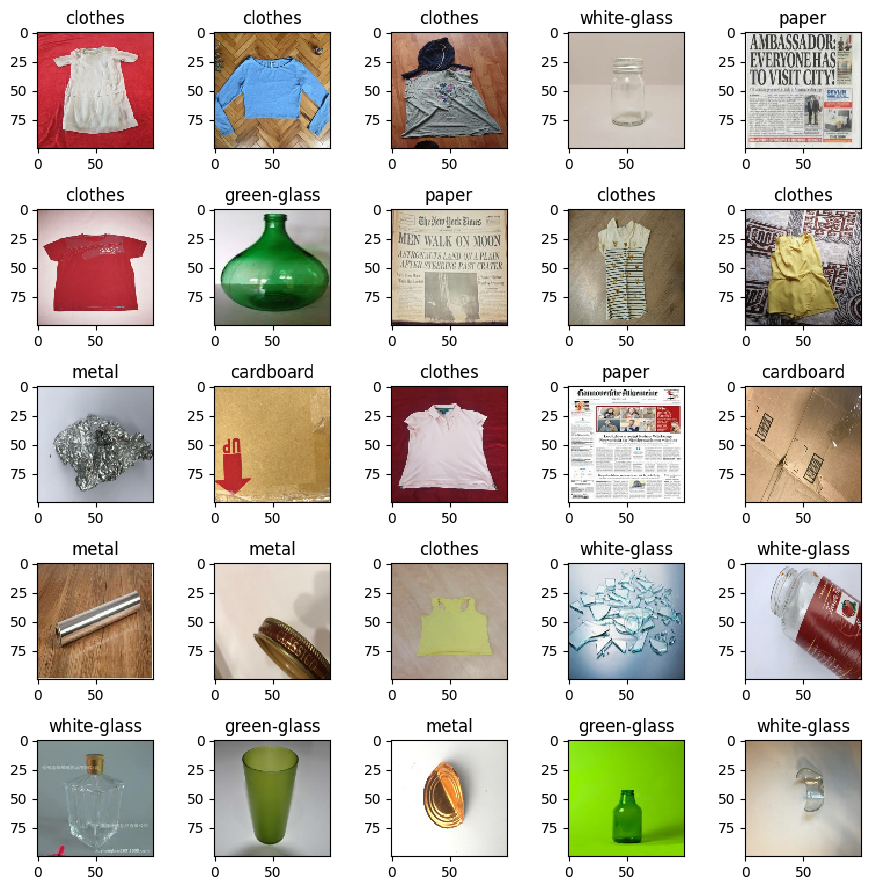

In [ ]:

plt.rcParams['figure.figsize'] = (9,9)

labels =  ['cardboard', 'clothes','green-glass','metal','paper','white-glass']

for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5,5,i+1)
    # plt.imshow() function displays the image at index i in the X_train array as a grayscale image, with no interpolation applied.
    plt.imshow(X_train[i], interpolation='none')
    plt.title("{}".format(labels[int(Y_train[i])]))

plt.tight_layout()

<a id = "cell_Model"></a>
## 3.Deep Learning Model Construction

### 3.1 Load the required libraries for CNN construction

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam, Adadelta
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

### 3.2 Model 6 CNN with 2 Conv layers, 2 MaxPooling layers, and 1 Dense hidden layer

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

def model_6():
    model = Sequential()
     # Convolutional Layer 1
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
      # Convolutional Layer 2
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
      # Flatten
    model.add(Flatten())
     # Dense hidden layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
       # Compile
    model.compile(
        loss='sparse_categorical_crossentropy',  # or categorical_crossentropy if one-hot
        optimizer=RMSprop(learning_rate=0.001, weight_decay=1e-6),
        metrics=['accuracy']
    )
    return model




Model 6 was developed as a convolutional neural network (CNN) using the Keras Sequential API. It features two convolutional layers; the first utilizes 64 filters with a 3×3 kernel and ReLU activation, followed by 2×2 max-pooling and a dropout rate of 0.25. The second layer employs 128 filters with a 3×3 kernel and ReLU activation, accompanied by similar max-pooling and dropout. The flattened feature maps are then processed by a fully connected dense layer with 128 neurons, ReLU activation, and a dropout rate of 0.5 to reduce overfitting. The output layer consists of six neurons corresponding to recyclable material classes, using softmax activation for multi-class classification. The model was compiled with RMSprop as the optimizer (learning rate = 0.001, weight decay = 1e-6) and sparse categorical crossentropy as the loss function, with accuracy as the evaluation metric.

### 3.3 Define image dimensions based on the training data shape

In [ ]:

img_rows, img_cols, channels = X_train.shape[1:]
num_classes = len(category_map)

print(f"Image dimensions: {img_rows}x{img_cols} with {channels} channels")
print(f"Number of classes: {num_classes}")

Image dimensions: 100x100 with 3 channels
Number of classes: 6


Normalizing pixel values: The expressions X_train /= 255 and X_test /= 255 serve to normalize the pixel values. As the original pixel values generally fall within the range of 0 to 255, dividing by 255 effectively scales these values to a range of 0.0 to 1.0. This normalization is critical, as it facilitates faster convergence of the neural network and may enhance performance by mitigating the influence of large input values on the learning process.

In [ ]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]


EarlyStopping is a callback that monitors a specific metric during training, in this case, val_loss (validation loss). If the metric does not improve over a specified number of epochs, training will stop early to avoid unnecessary computation and overfitting.

### 3.4 Model Execution

In [ ]:
model = model_6()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,743,686 (33.35 MB)

 Trainable params: 8,743,686 (33.35 MB)

 Non-trainable params: 0 (0.00 B)

This model summary presents a convolutional neural network (CNN) architecture featuring two convolutional blocks followed by dense layers for classification. The first convolutional layer employs 64 filters on the input, generating feature maps of size 98×98, accompanied by max pooling and dropout for regularization. The second layer increases the number of filters to 128, yielding feature maps reduced to 23×23 after pooling, with dropout applied once more.

A Flatten layer transforms these feature maps into a one-dimensional vector of 67,712 values, which is fed into a dense layer of 128 neurons. This fully connected layer contains the majority of the model’s parameters, exceeding 8.6 million, illustrating the substantial parameter density of dense layers relative to convolutional layers. Dropout is utilized again before the final output layer, which consists of six neurons corresponding to six classes of recyclable materials, utilizing softmax activation.

In total, the model encompasses approximately 8.7 million trainable parameters (33.35 MB), indicating a significant capability for capturing complex patterns while posing a risk of overfitting if not managed with adequate data and regularization techniques.

### 3.5 Compile and fit the model using RMSprop optimizer.

In [ ]:
model = model_6()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= RMSprop(learning_rate=0.001,weight_decay=1e-6),
              metrics=['accuracy'])
keras_callbacks = []
hist = model.fit(X_train, Y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(X_test, Y_test),
      validation_split=0.2,
      callbacks=keras_callbacks)

Epoch 1/100
15/15 - 9s - 570ms/step - accuracy: 0.2495 - loss: 2.7040 - val_accuracy: 0.4579 - val_loss: 1.4622
Epoch 2/100
15/15 - 0s - 23ms/step - accuracy: 0.3981 - loss: 1.4870 - val_accuracy: 0.5842 - val_loss: 1.2579
Epoch 3/100
15/15 - 0s - 23ms/step - accuracy: 0.5685 - loss: 1.1742 - val_accuracy: 0.6498 - val_loss: 1.0894
Epoch 4/100
15/15 - 0s - 23ms/step - accuracy: 0.6423 - loss: 1.0190 - val_accuracy: 0.6943 - val_loss: 0.9638
Epoch 5/100
15/15 - 0s - 23ms/step - accuracy: 0.6470 - loss: 1.0233 - val_accuracy: 0.5953 - val_loss: 1.0770
Epoch 6/100
15/15 - 0s - 23ms/step - accuracy: 0.6911 - loss: 0.9083 - val_accuracy: 0.7141 - val_loss: 0.8323
Epoch 7/100
15/15 - 0s - 23ms/step - accuracy: 0.6953 - loss: 0.8875 - val_accuracy: 0.7030 - val_loss: 0.8616
Epoch 8/100
15/15 - 0s - 23ms/step - accuracy: 0.7160 - loss: 0.8198 - val_accuracy: 0.5916 - val_loss: 1.1299
Epoch 9/100
15/15 - 0s - 23ms/step - accuracy: 0.7378 - loss: 0.7617 - val_accuracy: 0.7166 - val_loss: 0.7961


This training script establishes the architecture of Model 6 CNN, compiles it using the RMSprop optimizer (learning rate of 0.001 and weight decay of 1e-6), and implements the sparse categorical crossentropy loss function for integer class labels. The model is trained on the dataset with a batch size of 128 for up to 100 epochs, while performance is monitored on validation data. Both validation_data (X_test, Y_test) and validation_split=0.2 are included; however, it is generally advisable to use one method—either supplying a validation set or splitting the training data. The training history (hist) captures accuracy and loss metrics for both training and validation datasets, which can be visualized to assess learning progress. While callbacks are defined, they are currently unpopulated; in practice, they may include EarlyStopping or ModelCheckpoint to prevent overfitting and retain the best model. This configuration thus enables systematic training of the convolutional neural network, tracking performance improvements and generalization effectively.

### 3.5 Evaluate the model

In [ ]:
# Evaluate on training data
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.0005
Train accuracy: 1.0 

Test loss: 1.3757
Test accuracy: 0.7847


### 3.6 Plot history of learning

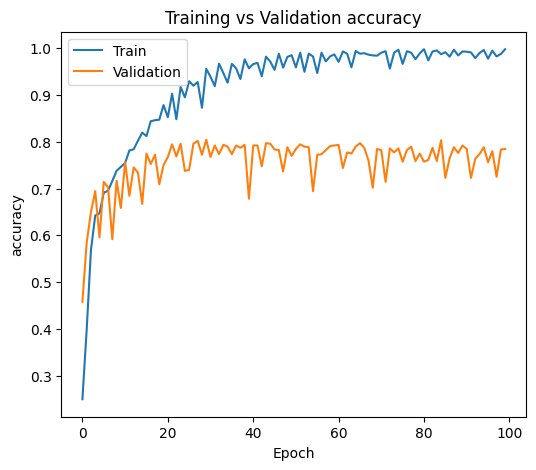

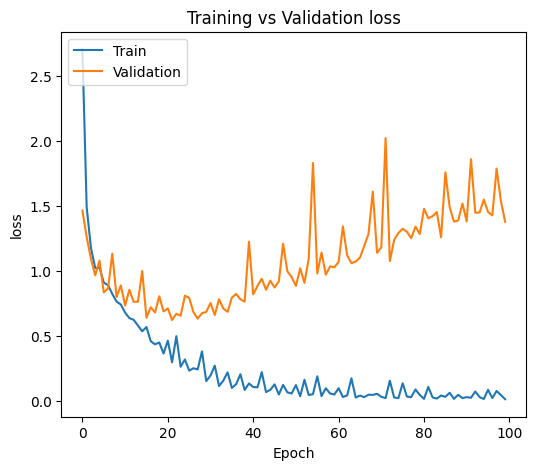

In [ ]:
plot_hist(hist)

### 3.7 Computing the accuracy, precision, recall, f1-score, and support

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = Y_test # Y_test is already in the correct integer format

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= labels)

# Print the report
print("The result of the classification report is: \n ",report)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
The result of Kappa is : 0.741
The result of the classification report is: 
                precision    recall  f1-score   support

   cardboard       0.83      0.79      0.81       122
     clothes       0.82      0.85      0.83       142
 green-glass       0.94      0.96      0.95       147
       metal       0.73      0.60      0.66       138
       paper       0.76      0.75      0.75       132
 white-glass       0.63      0.74      0.68       127

    accuracy                           0.78       808
   macro avg       0.78      0.78      0.78       808
weighted avg       0.79      0.78      0.78       808



In [ ]:
y_pred

array([[9.99999166e-01, 4.87879008e-11, 1.57301456e-16, 1.14790675e-12,
        7.96823258e-07, 2.41785658e-09],
       [1.64864372e-10, 1.00000000e+00, 4.31686174e-14, 8.76030612e-15,
        1.46699686e-14, 1.14435605e-11],
       [6.90526469e-03, 3.22104618e-03, 9.31753857e-06, 1.77330265e-04,
        7.61719882e-01, 2.27967069e-01],
       ...,
       [2.31391191e-03, 9.93716002e-01, 5.87282267e-09, 2.97424975e-07,
        1.09388624e-04, 3.86029133e-03],
       [1.00000000e+00, 1.40763922e-17, 9.74476600e-21, 1.26983190e-14,
        5.76301651e-15, 3.22172218e-19],
       [1.79186098e-17, 2.97034758e-10, 1.89320009e-13, 6.67318512e-09,
        1.00000000e+00, 7.30358884e-10]], dtype=float32)

### 3.8 Generate Confusion Matrix for inspection.

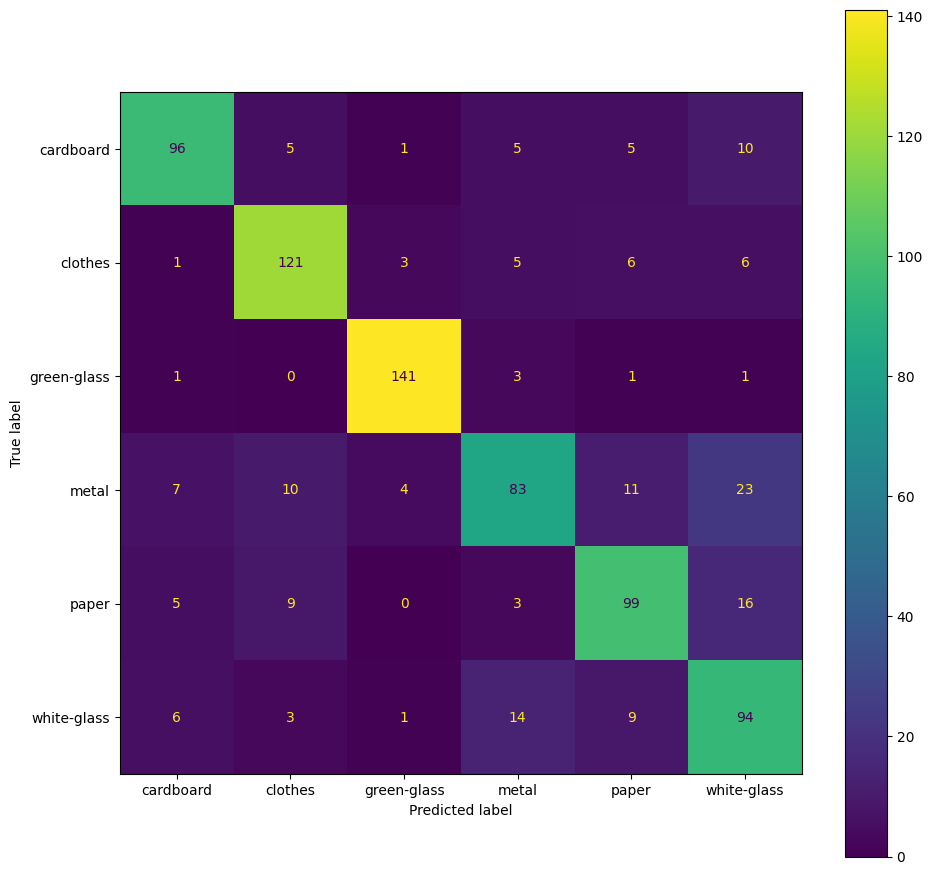

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

The confusion matrix illustrates the classification performance of the model across six recyclable material categories. Strong diagonal values indicate that most samples were accurately classified, particularly green glass (141 correct), clothes (121 correct), and paper (99 correct). However, notable misclassifications include metal being often confused with white glass (23 instances) and clothes (10 instances), as well as cardboard misidentified as white glass (10 instances). Similarly, white glass is confused with metal (14 instances) and paper (9 instances). These errors highlight the challenges in distinguishing visually similar materials, such as reflective surfaces and color overlaps. Overall, while the model performs well for most categories, certain classes—especially metal, cardboard, and white glass—are prone to confusion, indicating a need for more representative data or improved feature extraction techniques.

### 3.9 Print sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


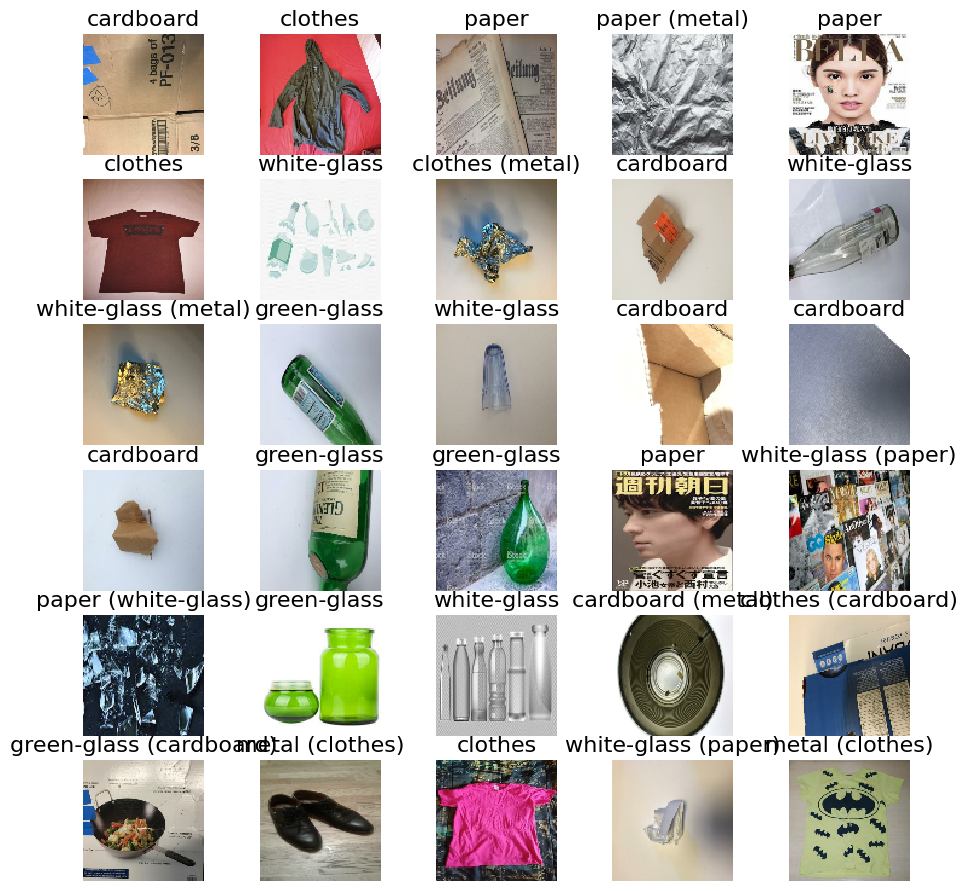

In [ ]:
img_range = range(30)
imgs = X_test[img_range]
true_labels = [labels[Y_test[x]] for x in img_range]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [labels[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(11,11), titles=titles)

This analysis of image classification results highlights both the strengths and limitations of the trained model. Certain predictions, such as cardboard boxes, clothing, paper, and green glass bottles, have been accurately classified, demonstrating the model's ability to distinguish between various features. However, misclassifications also occur, with metal sometimes identified as clothing due to shiny surfaces resembling fabric. Additionally, white glass is often misclassified as paper, likely due to its transparency against white backgrounds, and cardboard can be incorrectly categorized as metal when reflective surfaces are present. These inaccuracies align with the confusion matrix findings, revealing that the model struggles with visually similar characteristics, particularly among glass, paper, metal, and clothing. To enhance class separation in ambiguous cases, further preprocessing techniques, data augmentation, or more advanced architectures focusing on fine-grained texture differences may be required.

<a id = "cell_report"></a>
## 4.Experiments Report

This study focused on classifying recyclable materials using a dataset of 2,691 real-world images categorized into six types: cardboard, clothes, paper, metal, green glass, and white glass. The dataset was split into training and testing sets in a 70/30 ratio. Various artificial neural network (ANN) and convolutional neural network (CNN) architectures were developed and assessed. The main objective was to determine which model type demonstrates the best overall performance while also evaluating the weaknesses in accuracy at the class level.

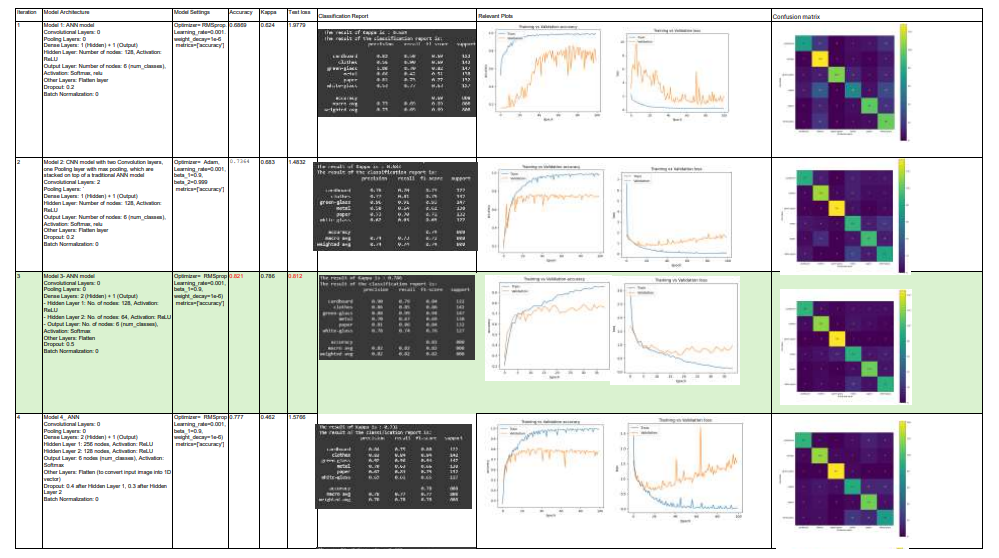

**Performance Evaluation of ANN Models**

This study developed four artificial neural network (ANN) models, identified as Models 1, 3, 4, and 5. These models featured one or two fully connected hidden layers with Rectified Linear Unit (ReLU) activations, dropout regularization between 0.2 and 0.5, and a softmax output layer for six-class classification.

Model 3 emerged as the best performer, achieving an accuracy of 82.1%, a Cohen’s kappa of 0.786, and a test loss of 0.812. Its architecture comprised two hidden layers with 128 and 64 neurons, respectively, both using ReLU activations, and included a dropout rate of 0.5. Optimization was conducted via the RMSprop algorithm, with a learning rate of 0.001. This configuration effectively balanced model complexity and regularization, enhancing generalization compared to the other models.

Training and validation curves indicated initial accuracy improvements, followed by signs of overfitting, where training accuracy neared perfection but validation accuracy plateaued around 82%. The confusion matrix displayed that although Model 3 correctly classified most samples, misclassifications occurred predominantly between clothes and cardboard, as well as between green glass and white glass. These errors stem from ANNs’ limitations in processing input pixels independently, preventing the extraction of critical spatial features.

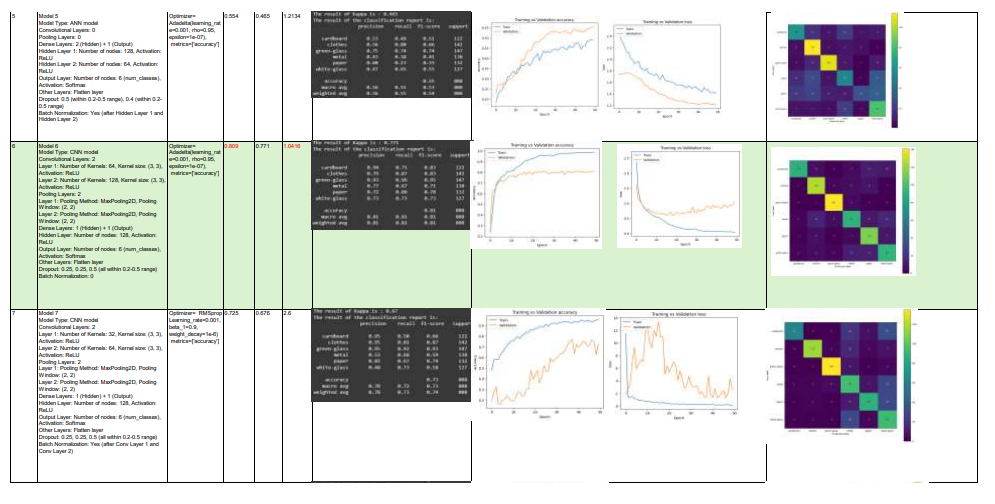

**CNN Model Performance**

Among the artificial neural network (ANN) models evaluated, Model 3 demonstrated the highest performance, achieving an accuracy of 82.1%, a Cohen’s kappa of 0.786, and a test loss of 0.812. Its architecture included two hidden layers with 128 and 64 neurons, ReLU activations, a dropout rate of 0.5, and optimization using RMSprop (learning rate = 0.001, β₁ = 0.9, weight decay = 1e-6). Despite its relatively shallow structure, Model 3 exhibited effective generalization, outperforming other ANN variants.

In the realm of convolutional neural networks (CNNs), Model 6 was the best-performing architecture, utilizing two convolutional layers (64 and 128 filters, kernel size 3×3, ReLU activation), followed by two max-pooling layers (2×2 windows) and a dense layer of 128 neurons before the softmax output. It applied dropout at three points (0.25, 0.25, and 0.5) for regularization and was optimized with Adadelta (learning rate = 0.001, ρ = 0.95, ε = 1e-07), achieving an accuracy of 80.9%, a kappa of 0.771, and a test loss of 1.0416.

In direct comparison, Model 3 (ANN) slightly outperformed Model 6 (CNN) in accuracy (82.1% vs. 80.9%) and kappa (0.786 vs. 0.771). This is notable given that CNNs are generally more effective for image tasks due to their ability to extract spatial features. The strong performance of the ANN may stem from the small dataset of 2,691 images and its well-regularized architecture.

However, CNNs still provide greater interpretability for spatial extraction and typically scale better with larger datasets. While the ANN achieved higher scores in this instance, CNNs remain a more promising architecture for long-term applications in real-world recycling systems, where data volume is expected to grow.

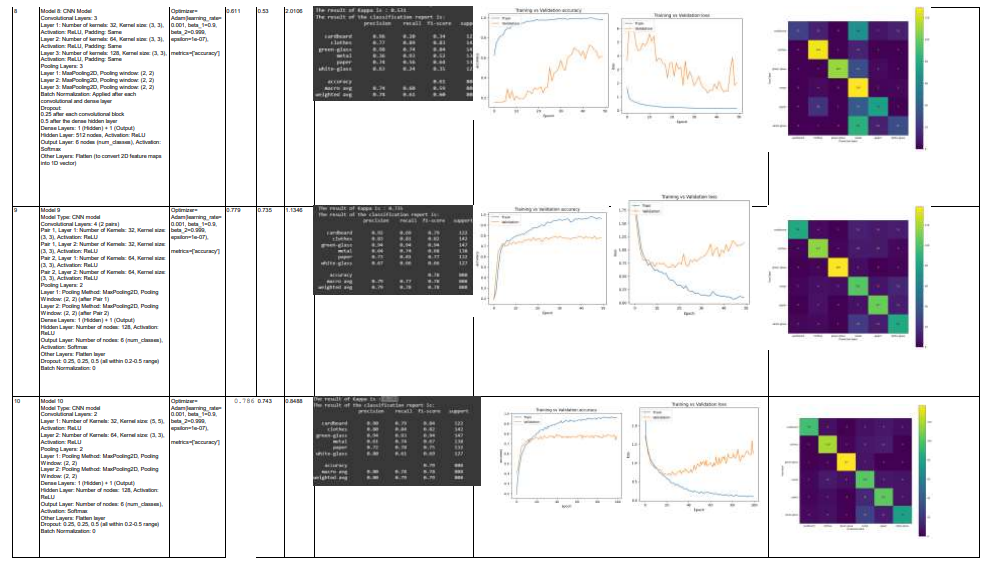


**Comparative Analysis: ANN versus CNN**

The experimental results provided valuable insights into the strengths and weaknesses of Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN) in recyclable material classification. Among the ANN models, Model 3 achieved the highest performance with an accuracy of 82.1%, a Cohen’s kappa of 0.786, and a test loss of 0.812, slightly outperforming the best CNN model, Model 6, which recorded an accuracy of 80.9%. Model 3's effectiveness can be attributed to its well-designed architecture of two hidden layers, a dropout rate of 0.5, and the use of RMSprop optimization.

However, the superior performance of Model 3 should be interpreted with caution. ANNs are limited in their ability to exploit spatial hierarchies in image data. Confusion matrices indicated persistent misclassifications among visually similar categories, while CNNs displayed better differentiation, effectively capturing edges and textures.

Additionally, CNNs scale more efficiently with larger datasets. Although ANNs may occasionally perform well on smaller datasets, CNNs are inherently more suited for real-world applications with larger and more variable data, demonstrating greater resilience to changes in lighting, background, and object orientation commonly encountered in recycling environments.

**Worst Performing Class**

Analysis of the classification reports and confusion matrices revealed that the accuracy of recognizing recyclable material categories varied significantly among classes. Both the Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN) indicated that clothing items and glass variants—specifically green glass and white glass—were the worst-performing categories.

The higher misclassification rates for clothing can be attributed to substantial intra-class variability, including different fabrics, colors, and textures, which hinder the models' ability to discern consistent features. Additionally, clothing was often misclassified as cardboard due to similarities in color tones or background contexts.

Similarly, the green glass and white glass categories displayed persistent confusion due to their similar visual characteristics, such as transparency and reflective surfaces. Even advanced CNN models struggled to differentiate between these classes, suggesting that the dataset may lack distinctive features under various conditions.

These findings underscore class imbalance and visual similarity as key challenges. Improving the performance of the underperforming classes will require strategies such as collecting more diverse training samples, applying data augmentation techniques, and incorporating more advanced architectures capable of focusing on subtle differences.


**Potential Approaches for Improvement and Sustainable Impact**

The results of the experiments indicate that convolutional neural networks (CNNs) surpass artificial neural networks (ANNs) in the classification of recyclable materials. Nonetheless, opportunities remain to enhance both performance and robustness. Several strategies may be considered, focusing on data collection, data processing, data formatting, and model architecture.

1. **Data Collection**  
   *Increase Dataset Size*: The current dataset of 2,691 images is relatively small for training deep learning models. The acquisition of additional images across all classes would mitigate overfitting and enhance generalization.  
   *Balance Across Classes*: Certain classes, such as clothing, green glass, and white glass, are underrepresented or exhibit greater complexity. Expanding these categories with diverse samples, reflecting various lighting conditions, backgrounds, and object shapes, would address class imbalance and improve equitable classification.  

2. **Data Processing**  
   *Image Augmentation*: Implement transformations such as rotations, flips, zooms, brightness and contrast adjustments, and the introduction of Gaussian noise. Such techniques will simulate real-world variability and lessen overfitting by compelling models to learn invariant features.  
   *Background Removal and Normalization*: Numerous images contain distracting backgrounds. Preprocessing techniques such as background subtraction, color normalization, and edge detection can assist models in concentrating on the material itself, thus eliminating irrelevant features.  
   *Noise Reduction*: Employing filters to diminish reflections or lighting artifacts may enhance classification accuracy, particularly for categories related to glass.

3. **Data Formatting**  
   *Standardized Image Size*: Resizing all images to a consistent resolution, such as 128×128 or 224×224 pixels, will facilitate streamlined training and minimize computational overhead.  
   *Color Space Experiments*: Although RGB images were utilized, exploring alternative formats such as grayscale or HSV may enhance separability for certain types of materials, particularly in distinguishing glass transparency.  
   *Annotation Enhancement*: Enriching labels with metadata, such as lighting conditions, source environment (indoor versus outdoor), or camera type, will support the development of multi-modal models in future research.

4. **Modelling Architecture**  
 *Deeper Architectures*: The incorporation of additional convolutional layers, residual connections, or attention mechanisms could facilitate the capture of fine-grained differences between visually similar classes.  
  *Ensemble Methods*: The combination of multiple CNNs or hybrid ANN-CNN approaches may enhance robustness, as ensemble models tend to mitigate the weaknesses of individual models.  



## 5 Role of GenAI

**Role of GenAI in Model Development**

Generative AI, using in this report is Gemini from Google play a crucial role in developing classification models through several key functions:

1. *Code Generation and Explanation*: GenAI can help generate code for tasks like data loading, preprocessing, model architecture, and evaluation metrics. It also provides explanations for existing code, aiding understanding of model layers and their functions.

2. *Troubleshooting Errors*: If errors arise during execution, GenAI can assist in diagnosing issues by suggesting potential causes and offering corrected code, streamlining the debugging process.

3. *Developing Model Architectures*: While GenAI can't identify the best model definitively, it can propose different architectures and hyperparameter configurations based on best practices, offering insights into layer purposes and their impact on performance.

**GenAI as a Collaborative Tool**

Gemini acts as a quick reference for code and architectural queries, allowing for an efficient, iterative development process without needing to search through documentation.

*Challenges of Using GenAI*

Despite its utility, there are challenges:
- *Creating Model*: GenAI can suggest architectures but cannot perform the exhaustive training necessary to find the optimal model.
- *Contextual Understanding*: It may lack nuanced understanding of specific datasets or goals without clear instructions.
- *Over-Reliance*: Users risk becoming overly dependent on GenAI, which can hinder genuine understanding and innovation.
- *Code Accuracy and Suitability*: Generated code may contain errors or may not be the best fit for the task, necessitating critical review.

In summary, while GenAI accelerates development and assists with coding and troubleshooting, it requires critical engagement and understanding from the user.